# Hyperparameter Tuning for Sentiment Analysis using CRF

This notebook demonstrates hyperparameter optimization for a Conditional Random Fields (CRF) model to perform sentiment analysis. We'll track experiments with MLflow and find the best model configuration.

## Setup and Imports

In [1]:
import numpy as np
import mlflow
import pandas as pd

import sys
sys.path.append('..')
from src.models.train_models import ModelTrainer
from src.models.predict_models import ModelPredictor
from src.config import *

## Define Hyperparameter Grid

We'll create a grid of hyperparameters to search through:

- **c1**: L1 regularization coefficient
- **c2**: L2 regularization coefficient
- **max_iterations**: Maximum number of iterations for optimization

In [2]:
# Define hyperparameter grids to search
c1_values = [0.1, 0.5, 1.0]
c2_values = [0.1, 0.5, 1.0]
max_iterations_values = [50, 100, 150]

## Hyperparameter Grid Search

Now we'll run through all combinations of hyperparameters and track the results using MLflow.

In [3]:
results = []

for c1 in c1_values:
    for c2 in c2_values:
        for max_iter in max_iterations_values:
            print(f"Training with c1={c1}, c2={c2}, max_iterations={max_iter}")
            try:
                run_id = ModelTrainer.crf(c1=c1, c2=c2, max_iterations=max_iter)

                with mlflow.start_run(run_id=run_id):
                    run = mlflow.get_run(run_id)
                    metrics = run.data.metrics
                    params = run.data.params

                    results.append({
                        'run_id': run_id,
                        'c1': params.get('c1'),
                        'c2': params.get('c2'),
                        'max_iterations': params.get('max_iterations'),
                        'train_accuracy': metrics.get('train_accuracy'),
                        'test_accuracy': metrics.get('test_accuracy'),
                        'test_precision': metrics.get('test_precision'),
                        'test_recall': metrics.get('test_recall'),
                        'test_f1': metrics.get('test_f1'),
                    })
            except Exception as e:
                print(f"Error training with c1={c1}, c2={c2}, max_iterations={max_iter}: {e}")
                continue

Training with c1=0.1, c2=0.1, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:12:53 INFO mlflow.pyfunc: Validating input example against model signature
d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update ju

Training with c1=0.1, c2=0.1, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:13:04 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.1, c2=0.1, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:13:15 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.1, c2=0.5, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:13:25 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.1, c2=0.5, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:13:36 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.1, c2=0.5, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:13:46 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.1, c2=1.0, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:13:56 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.1, c2=1.0, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:14:06 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.1, c2=1.0, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:14:16 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=0.1, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:14:26 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=0.1, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:14:36 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=0.1, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:14:47 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=0.5, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:14:56 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=0.5, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:15:06 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=0.5, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:15:16 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=1.0, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:15:26 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=1.0, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:15:35 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=0.5, c2=1.0, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:15:45 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=0.1, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:15:55 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=0.1, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:16:05 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=0.1, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:16:15 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=0.5, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:16:25 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=0.5, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:16:35 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=0.5, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:16:44 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=1.0, max_iterations=50
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:16:54 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=1.0, max_iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:17:03 INFO mlflow.pyfunc: Validating input example against model signature



Training with c1=1.0, c2=1.0, max_iterations=150
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/23 04:17:13 INFO mlflow.pyfunc: Validating input example against model signature



## Print All Model Test Accuracies

Let's display the test accuracies for all models, sorted by performance.


All Models Test Accuracies (sorted):

 c1  c2 max_iterations  test_accuracy
0.1 1.0            150       0.767964
0.1 1.0            100       0.767964
0.1 1.0             50       0.767964
0.1 0.5            150       0.765968
0.1 0.5            100       0.765968
0.1 0.5             50       0.765968
0.5 1.0            100       0.742265
0.5 1.0            150       0.742265
0.5 1.0             50       0.742265
0.1 0.1            150       0.737525
0.1 0.1             50       0.737525
0.1 0.1            100       0.737525
0.5 0.5            150       0.733034
0.5 0.5            100       0.733034
0.5 0.5             50       0.733034
1.0 1.0             50       0.726547
1.0 1.0            100       0.726547
1.0 1.0            150       0.726547
1.0 0.5            150       0.712824
1.0 0.5             50       0.712824
1.0 0.5            100       0.712824
0.5 0.1            100       0.708084
0.5 0.1             50       0.708084
0.5 0.1            150       0.708084
1.0 0.1    

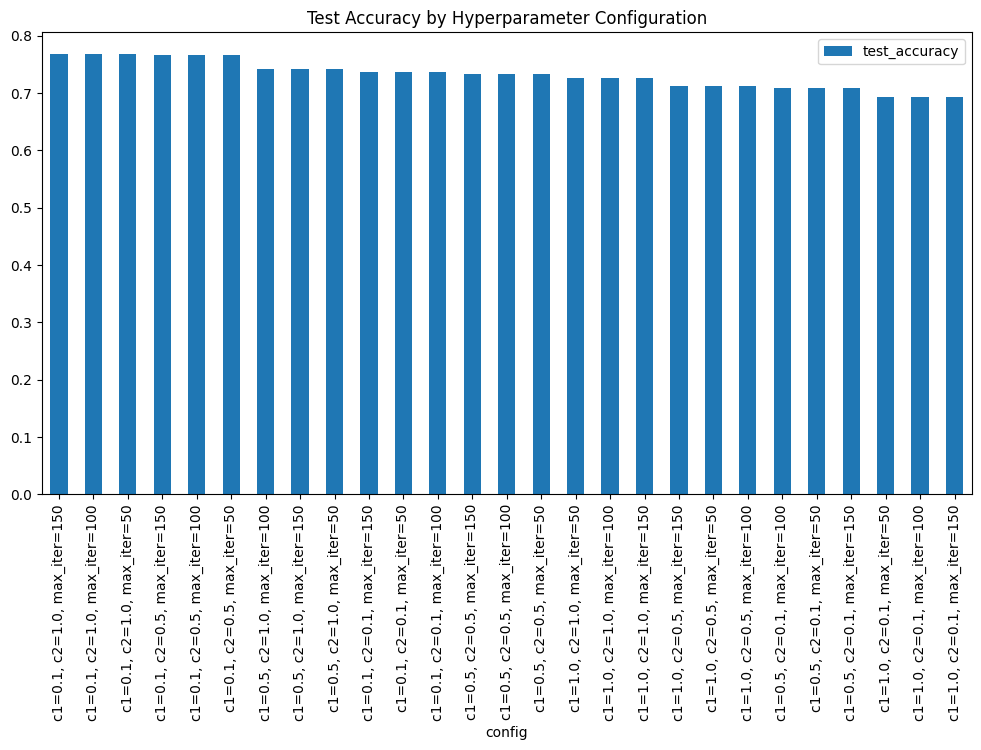

In [4]:
# Create dataframe from results
results_df = pd.DataFrame(results)

# Print all model test accuracies, sorted from best to worst
if not results_df.empty and 'test_accuracy' in results_df.columns:
    sorted_results = results_df.sort_values('test_accuracy', ascending=False)
    
    print("\nAll Models Test Accuracies (sorted):\n")
    print(sorted_results[['c1', 'c2', 'max_iterations', 'test_accuracy']].to_string(index=False))
    
    # Create a combined label for each configuration
    sorted_results['config'] = sorted_results.apply(
        lambda row: f"c1={row['c1']}, c2={row['c2']}, max_iter={row['max_iterations']}", axis=1)
    
    # Plot with the combined label
    sorted_results.plot(
        kind='bar', x='config', y='test_accuracy', figsize=(12, 6),
        title='Test Accuracy by Hyperparameter Configuration'
    )
else:
    print("\nNo successful model runs found with test_accuracy metric.")

## Analyzing Results and Finding the Best Model

In [5]:
# Find the best model
if not results_df.empty and 'test_accuracy' in results_df.columns:
    best_model = results_df.loc[results_df['test_accuracy'].idxmax()]
    best_run_id = best_model['run_id']
    
    print("\nBest model:")
    print(f"c1: {best_model['c1']}, c2: {best_model['c2']}, max_iterations: {best_model['max_iterations']}")
    
    # Print test metrics
    print(f"Test Accuracy: {best_model['test_accuracy']:.4f}")
    
    # Check and print other test metrics if they exist
    for metric in ['test_f1', 'test_precision', 'test_recall']:
        if metric in best_model:
            print(f"{metric.replace('_', ' ').title()}: {best_model[metric]:.4f}")
    
    # Print train metrics
    if 'train_accuracy' in best_model:
        print(f"Train Accuracy: {best_model['train_accuracy']:.4f}")
    
    # Check and print other train metrics if they exist
    for metric in ['train_f1', 'train_precision', 'train_recall']:
        if metric in best_model:
            print(f"{metric.replace('_', ' ').title()}: {best_model[metric]:.4f}")
    
    print(f"Run ID: {best_run_id}")
else:
    print("\nNo successful model runs found with test_accuracy metric.")
    best_run_id = None


Best model:
c1: 0.1, c2: 1.0, max_iterations: 50
Test Accuracy: 0.7680
Test F1: 0.7160
Test Precision: 0.7186
Test Recall: 0.7680
Train Accuracy: 1.0000
Run ID: 84aa31ed76cc40429992bf657e4c8af8


## Making Predictions with the Best Model

In [6]:
if best_run_id is not None:
    # Prediction with the best model found
    texts = np.array(["This product works great!", "Terrible experience..."])
    predictions = ModelPredictor.predict(best_run_id, texts)

    print(f"\nPredictions with Best Model (Run ID: {best_run_id[:8]}...):\n")
    for text, pred in zip(texts, predictions):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"'{text}' -> {sentiment}")


Predictions with Best Model (Run ID: 84aa31ed...):

'This product works great!' -> Negative
'Terrible experience...' -> Negative
